# **회고**

배우고 느낀 것은 많지만 막상 적으려니 표현하기가 어렵습니다.

1. 데이터의 처리는 전 과제 해결 과정에서 연속임을 몸소 느꼈습니다.
2. 문제를 잘 정의해야 적합한 모델에 접근할 수 있음을 절감했습니다.
3. 팀원과 저는 상보적 관계임을 다시 한 번 체감했습니다.
4. 부족함을 느꼈지만 그것이 또 재미있었습니다. 이상입니다.

# 국가별 참가 선수 성비

In [2]:
pip install koreanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 21.5 MB/s eta 0:00:00


In [81]:
# 데이터프레임 처리
import pandas as pd
import numpy as np

# 그래프_시각화 도구
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

# 지도_시각화 도구
import folium

In [4]:
athelete_events = pd.read_csv('/content/drive/MyDrive/아이펠 온라인 8기 코어 과정/아이펠 본과정/데이터톤/athelete_events_with_L_l_N.csv')

In [5]:
athelete_events.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Latitude,Longitude,Nation
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,36.9026,98.59380,China
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,36.9026,98.59380,China
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,56.2612,9.24882,Denmark
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,56.2612,9.24882,Denmark
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,52.1079,5.53410,Netherlands


In [ ]:
fig = px.scatter(general_df, x='발생년월일', y='발생시간', color='발생지시도', hover_data=['발생시간'])
fig.show()

## 데이터 전처리

In [55]:
country_gender = pd.pivot_table(
    athelete_events, index = 'Nation', columns = 'Sex', values = 'ID',aggfunc = 'count').sort_values(by = 'M')

In [61]:
len(country_gender)

204

## 데이터 시각화

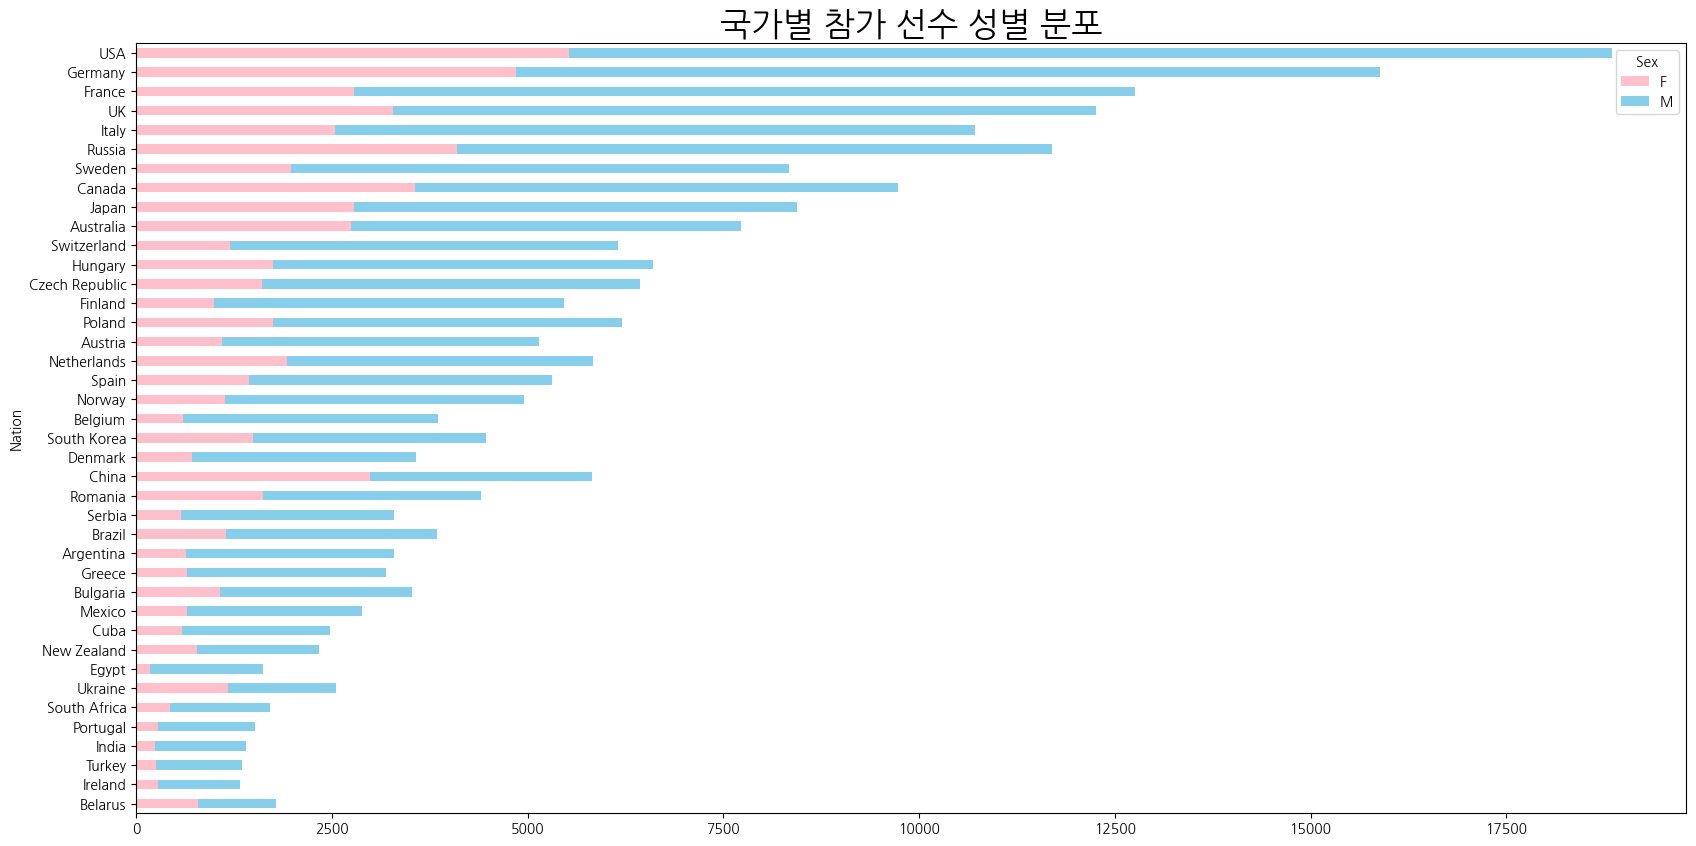

In [69]:
fig, ax = plt.subplots(figsize=(20, 10))

country_gender[-40:].plot(kind='barh', stacked=True, color=['pink', 'skyblue'], ax=ax)

ax.set_title('국가별 참가 선수 성별 분포', fontsize=24)
plt.show()


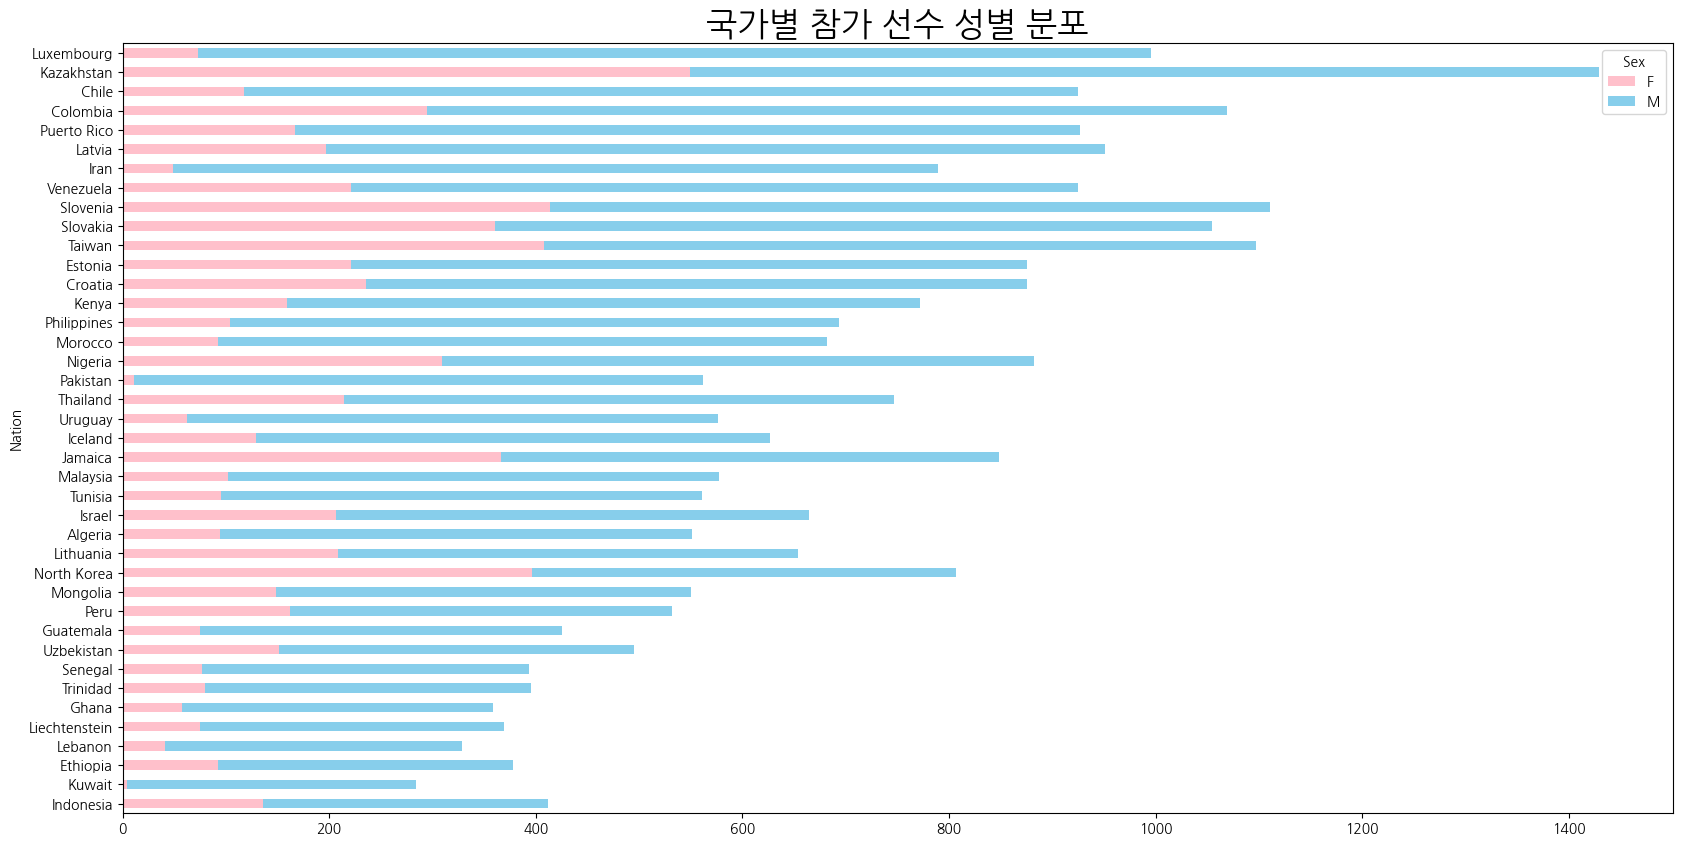

In [70]:
fig, ax = plt.subplots(figsize=(20, 10))

country_gender[-80:-40].plot(kind='barh', stacked=True, color=['pink', 'skyblue'], ax=ax)

ax.set_title('국가별 참가 선수 성별 분포', fontsize=24)
plt.show()


<Axes: ylabel='Nation'>

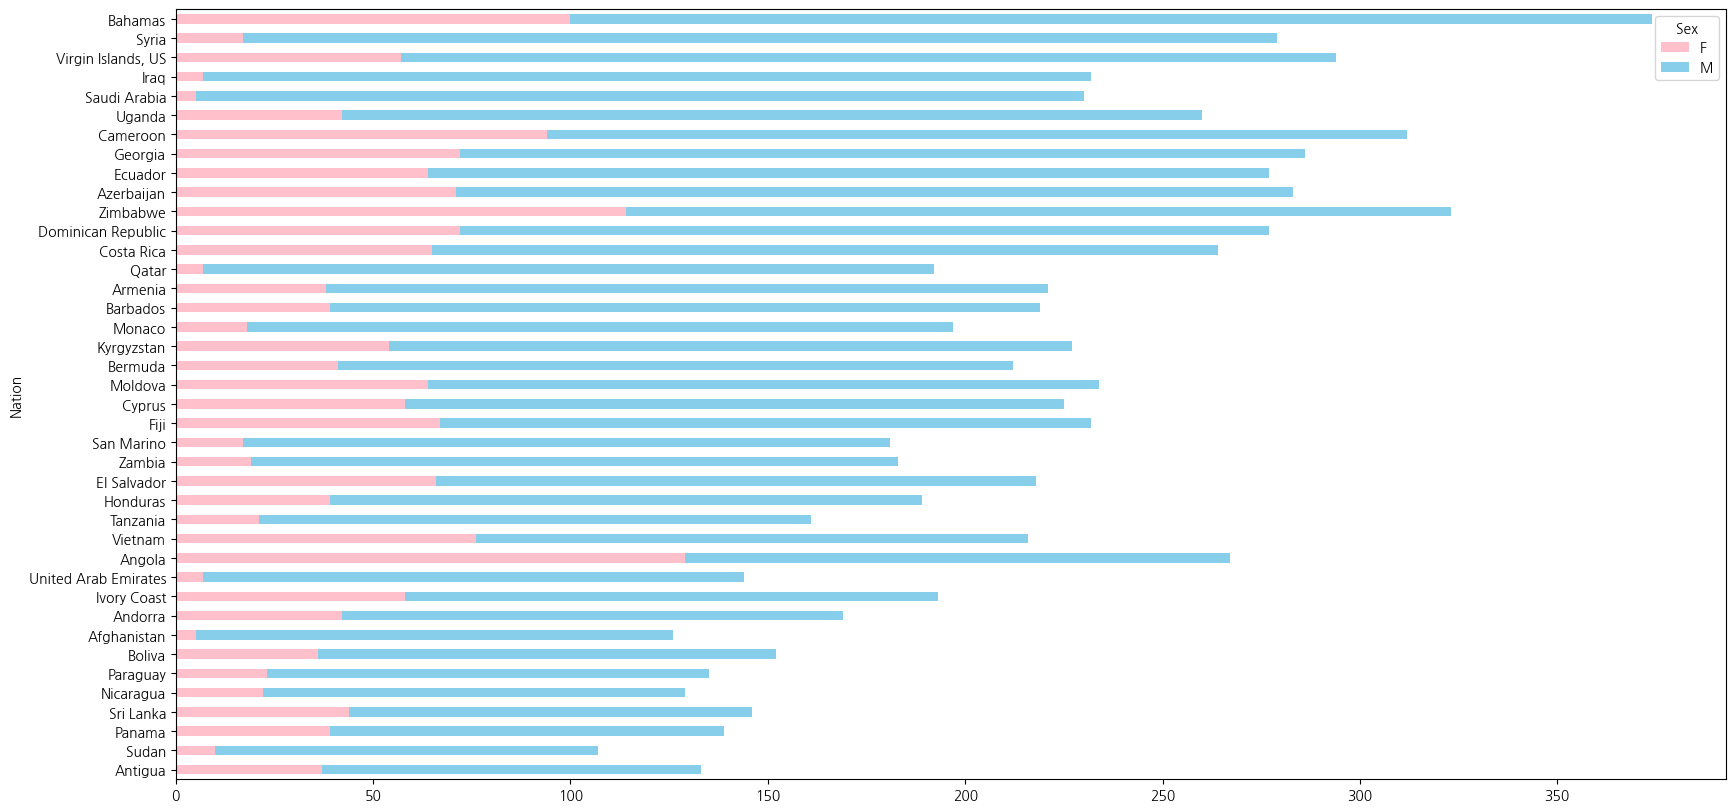

In [60]:
country_gender[-120:-80].plot(kind='barh', figsize=(20, 10), stacked=True, color=['pink', 'skyblue'])

<Axes: ylabel='Nation'>

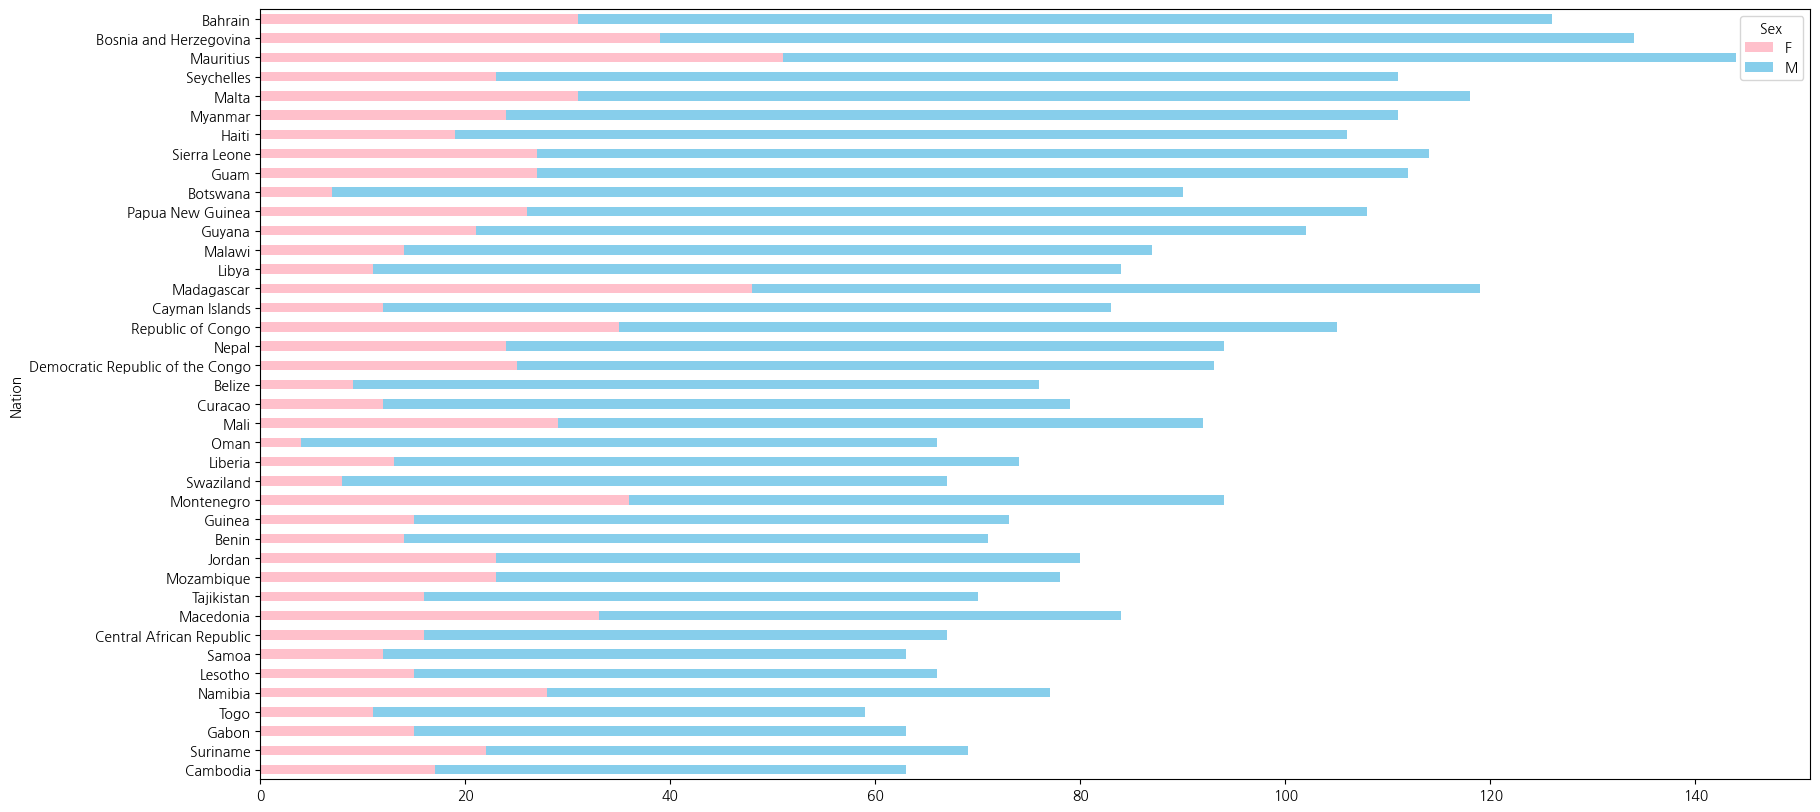

In [63]:
country_gender[-160:-120].plot(kind='barh', figsize=(20, 10), stacked=True, color=['pink', 'skyblue'])

<Axes: ylabel='Nation'>

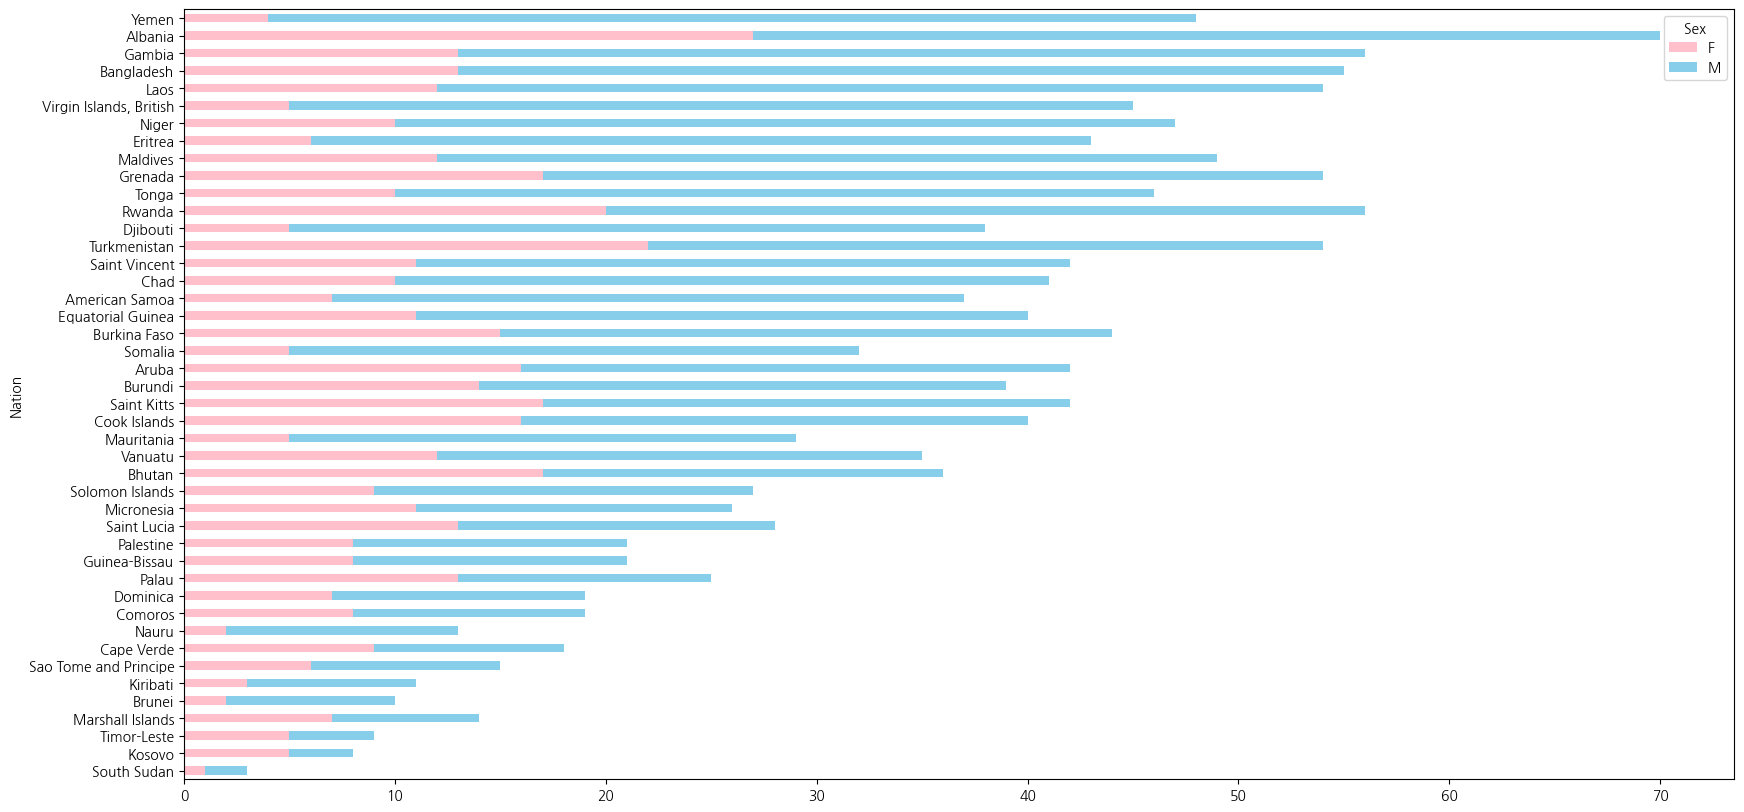

In [64]:
country_gender[-204:-160].plot(kind='barh', figsize=(20, 10), stacked=True, color=['pink', 'skyblue'])

# 연령대별 메달 획득 현황

## 데이터 전처리

In [85]:
athelete_events['Medal'] = athelete_events['Medal'].fillna('No Medal')

In [120]:
athelete_events

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Latitude,Longitude,Nation
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No Medal,36.9026,98.59380,China
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No Medal,36.9026,98.59380,China
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,No Medal,56.2612,9.24882,Denmark
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,56.2612,9.24882,Denmark
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,No Medal,52.1079,5.53410,Netherlands
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,No Medal,51.9217,19.15880,Poland
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",No Medal,51.9217,19.15880,Poland
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",No Medal,51.9217,19.15880,Poland
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,No Medal,51.9217,19.15880,Poland


In [121]:
age_medal = pd.pivot_table(athelete_events, index = 'Age',
                           columns = 'Medal', values = 'ID', aggfunc = 'count')

In [122]:
desired_order = [ 'No Medal', 'Bronze', 'Silver', 'Gold']
age_medal = age_medal.reindex(columns=desired_order)

# Alternatively, sort columns alphabetically
#age_medal = age_medal.sort_index(axis=1)

In [123]:
age_medal

Medal,No Medal,Bronze,Silver,Gold
Age,,,,
10.0,NaN,1.0,NaN,NaN
11.0,12.0,NaN,1.0,NaN
12.0,33.0,3.0,3.0,NaN
13.0,171.0,2.0,7.0,7.0
14.0,762.0,18.0,30.0,27.0
...,...,...,...,...
81.0,2.0,NaN,NaN,NaN
84.0,1.0,NaN,NaN,NaN
88.0,3.0,NaN,NaN,NaN


In [96]:
len(age_medal)

74

## 데이터 시각화

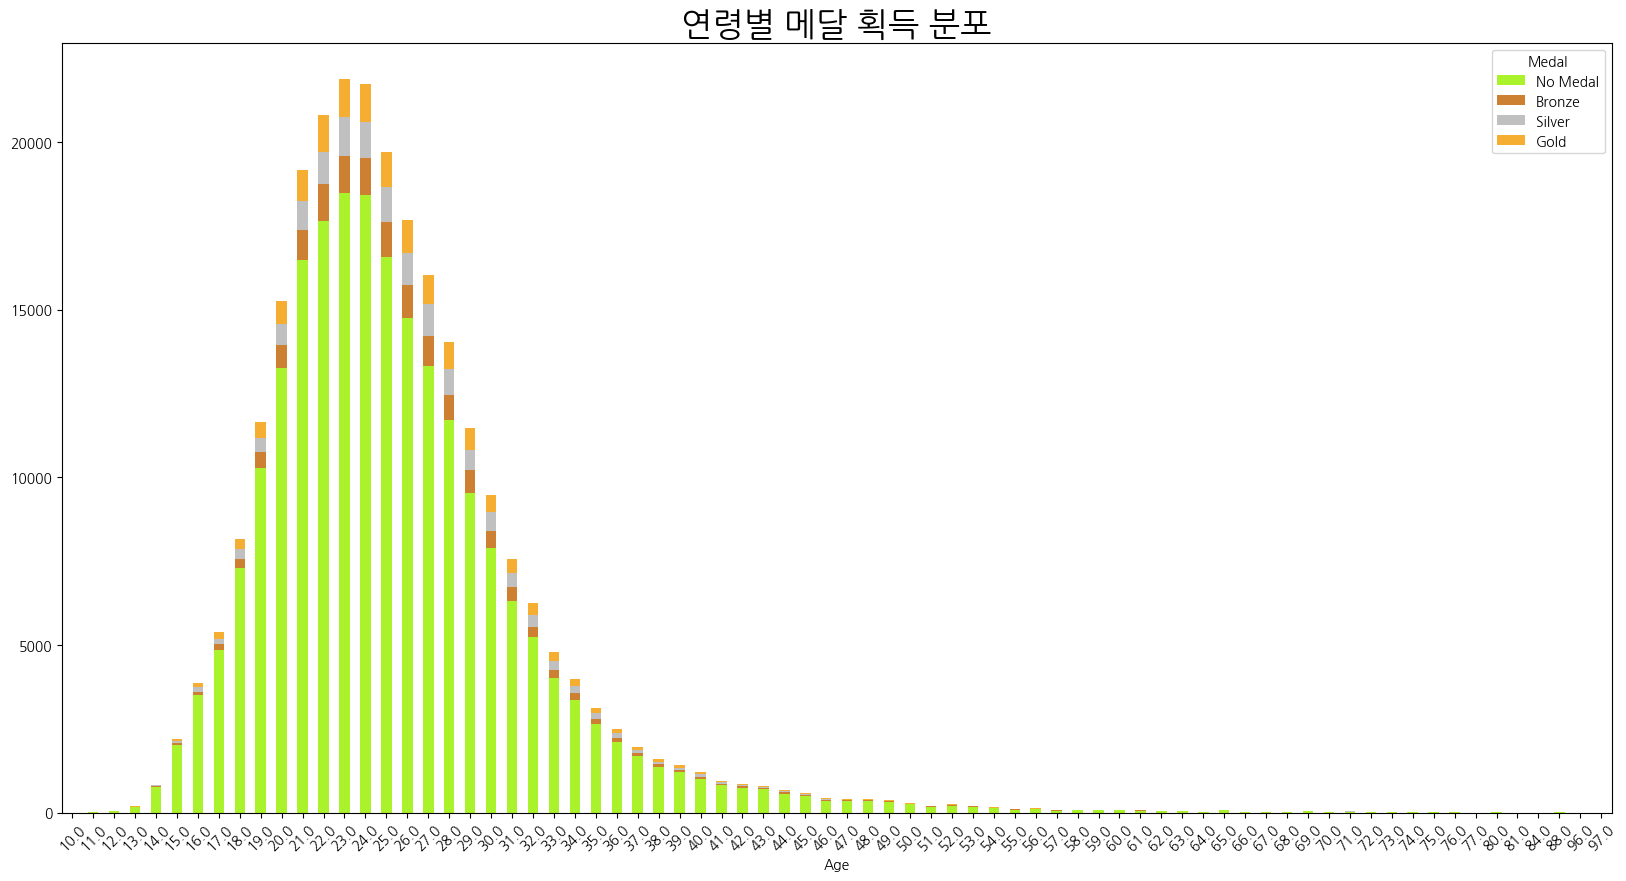

In [110]:
fig, ax = plt.subplots(figsize=(20, 10))
colors = ['#AAF22B', '#CD7F32','#C0C0C0', '#F5AE32']
age_medal.plot(kind='bar', stacked=True, color=colors, ax=ax)

ax.set_title('연령별 메달 획득 분포', fontsize=24)
plt.xticks(rotation=45)  # You can change the angle as needed

plt.show()


# 연도별 메달 수여 현황

##데이터 전처리

In [132]:
year_medal = pd.pivot_table(athelete_events, index = 'Year',
                           columns = 'Medal', values = 'ID', aggfunc = 'count')

In [133]:
year_medal

Medal,Bronze,Gold,No Medal,Silver
Year,,,,
1896,38,62,237,43
1900,175,201,1332,228
1904,150,173,815,163
1906,145,157,1275,156
1908,256,294,2270,281
1912,300,326,3099,315
1920,367,493,2984,448
1924,311,332,4731,319
1928,281,275,4751,267


In [134]:
desired_order = ['No Medal', 'Bronze', 'Silver', 'Gold']
year_medal = year_medal.reindex(columns=desired_order)

In [135]:
year_medal

Medal,No Medal,Bronze,Silver,Gold
Year,,,,
1896,237,38,43,62
1900,1332,175,228,201
1904,815,150,163,173
1906,1275,145,156,157
1908,2270,256,281,294
1912,3099,300,315,326
1920,2984,367,448,493
1924,4731,311,319,332
1928,4751,281,267,275


##데이터 시각화

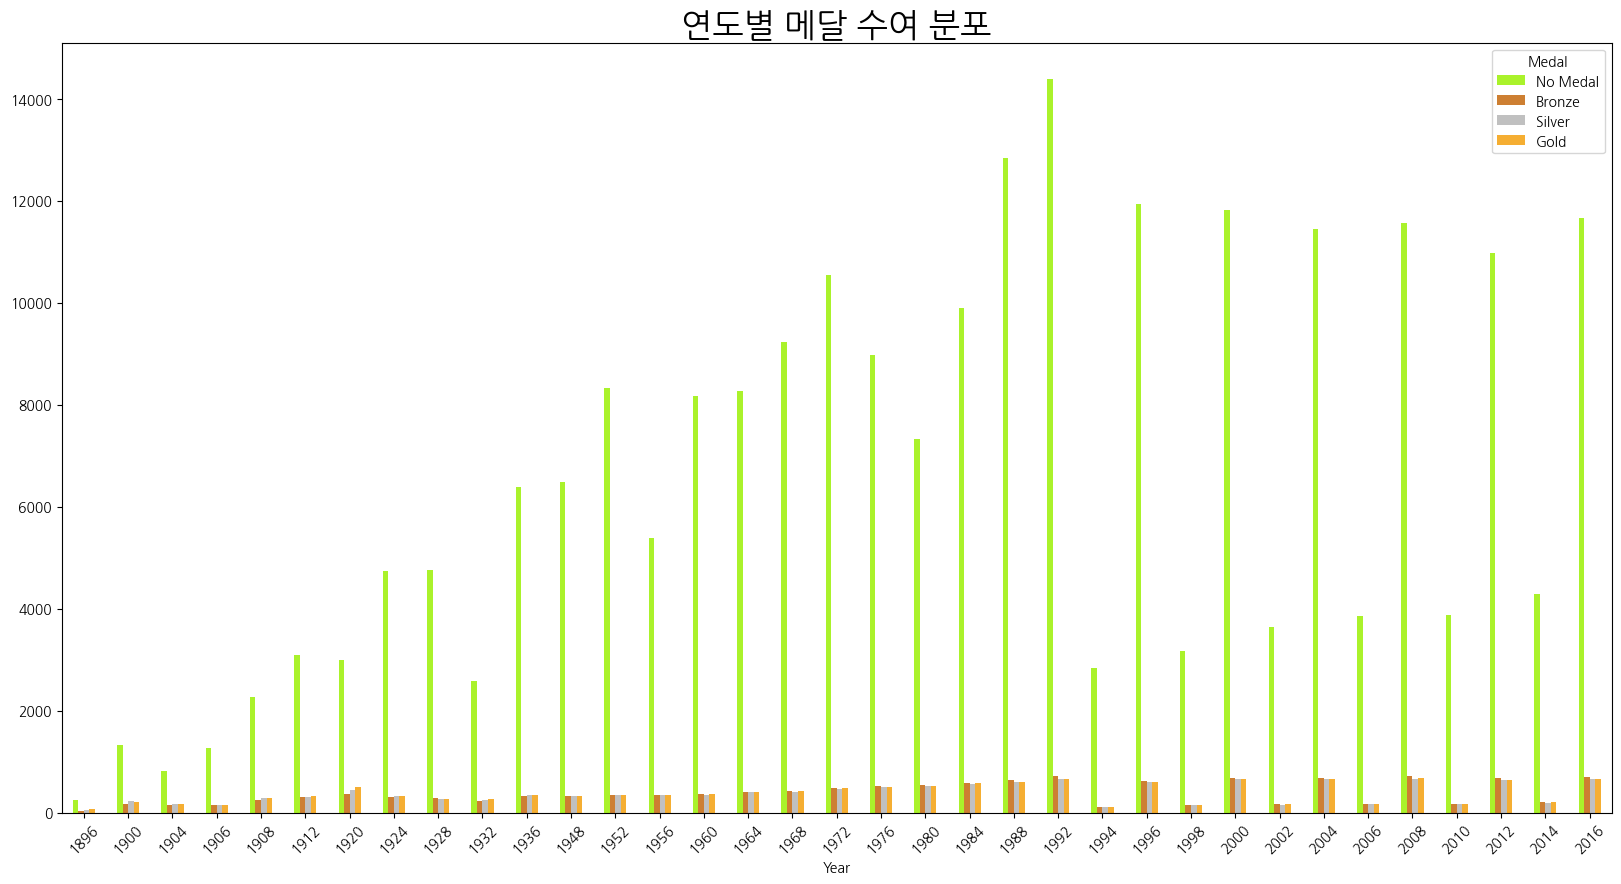

In [139]:
fig, ax = plt.subplots(figsize=(20, 10))
colors = ['#AAF22B', '#CD7F32', '#C0C0C0', '#F5AE32']
year_medal.plot(kind='bar', color=colors, ax=ax)

ax.set_title('연도별 메달 수여 분포', fontsize=24)
plt.xticks(rotation=45)  # You can change the angle as needed

plt.show()


# 종목별 메달 수여 현황

## 데이터 전처리

In [157]:
sport_medal = pd.pivot_table(athelete_events, index = 'Sport',
                           columns = 'Medal', values = 'ID', aggfunc = 'count').sort_values(by = 'No Medal')

In [158]:
desired_order = ['Gold', 'Silver', 'Bronze', 'No Medal']
sport_medal = sport_medal.reindex(columns=desired_order)

In [159]:
sport_medal

Medal,Gold,Silver,Bronze,No Medal
Sport,,,,
Roque,1.0,1.0,1.0,1.0
Racquets,3.0,3.0,4.0,2.0
Jeu De Paume,1.0,1.0,1.0,8.0
Motorboating,7.0,NaN,NaN,10.0
Croquet,4.0,2.0,2.0,11.0
...,...,...,...,...
Alpinism,25.0,NaN,NaN,NaN
Basque Pelota,2.0,NaN,NaN,NaN
Cricket,12.0,12.0,NaN,NaN


## 데이터 시각화

In [163]:
len(sport_medal)

66

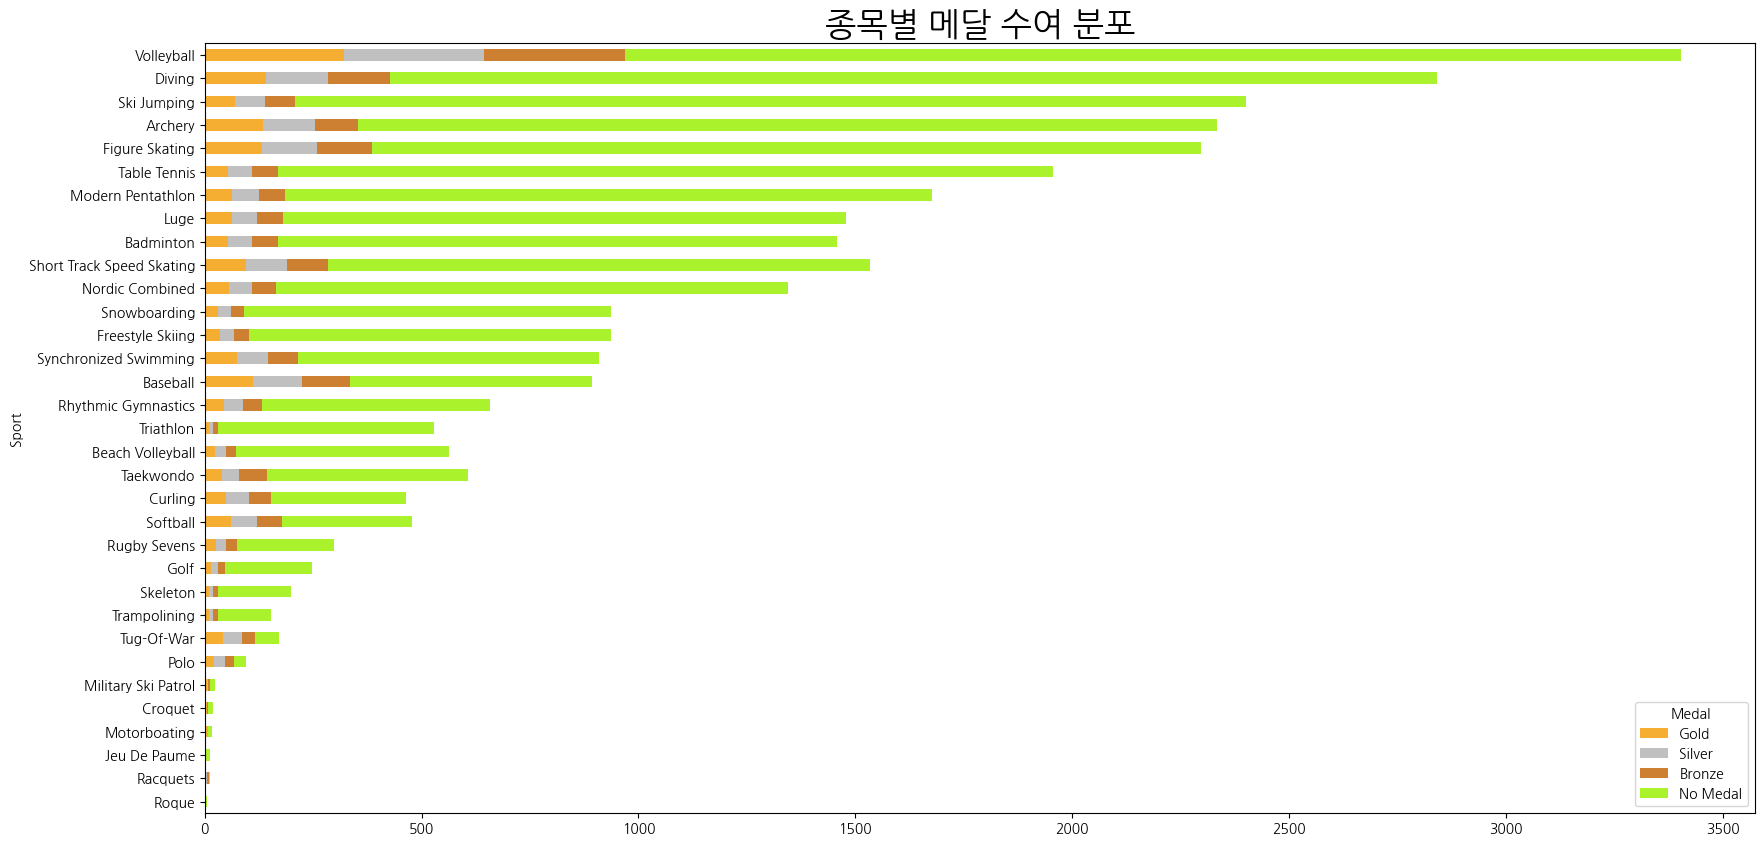

In [165]:
fig, ax = plt.subplots(figsize=(20, 10))

colors = [ '#F5AE32', '#C0C0C0', '#CD7F32', '#AAF22B']
sport_medal[:33].plot(kind='barh',  stacked=True, color=colors, ax=ax)

ax.set_title('종목별 메달 수여 분포', fontsize=24)

plt.show()


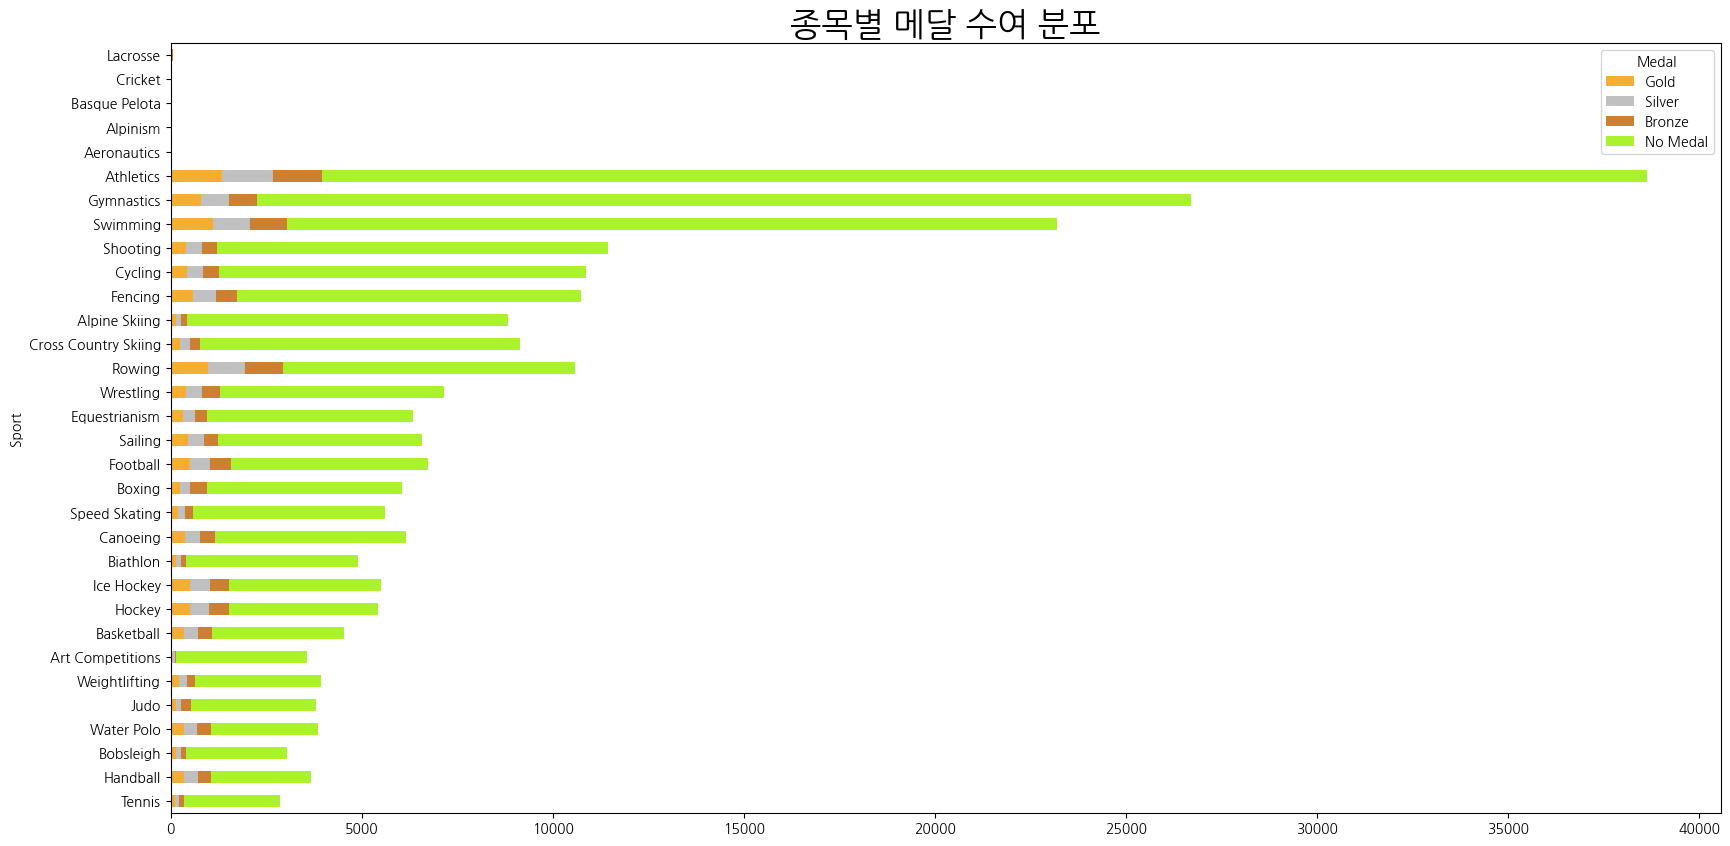

In [166]:
fig, ax = plt.subplots(figsize=(20, 10))

colors = [ '#F5AE32', '#C0C0C0', '#CD7F32', '#AAF22B']
sport_medal[33:65].plot(kind='barh',  stacked=True, color=colors, ax=ax)

ax.set_title('국가별 참가 선수 성별 분포', fontsize=24)

ax.set_title('종목별 메달 수여 분포', fontsize=24)

plt.show()


# 세부 종목별 메달 수여 현황

## 데이터 전처리

In [174]:
event_medal = pd.pivot_table(athelete_events, index = 'Event',
                           columns = 'Medal', values = 'ID', aggfunc = 'count').sort_values(by = 'No Medal')

In [175]:
desired_order = ['Gold', 'Silver', 'Bronze', 'No Medal']
event_medal = event_medal.reindex(columns=desired_order)

In [176]:
len(event_medal)

765

## 데이터 시각화

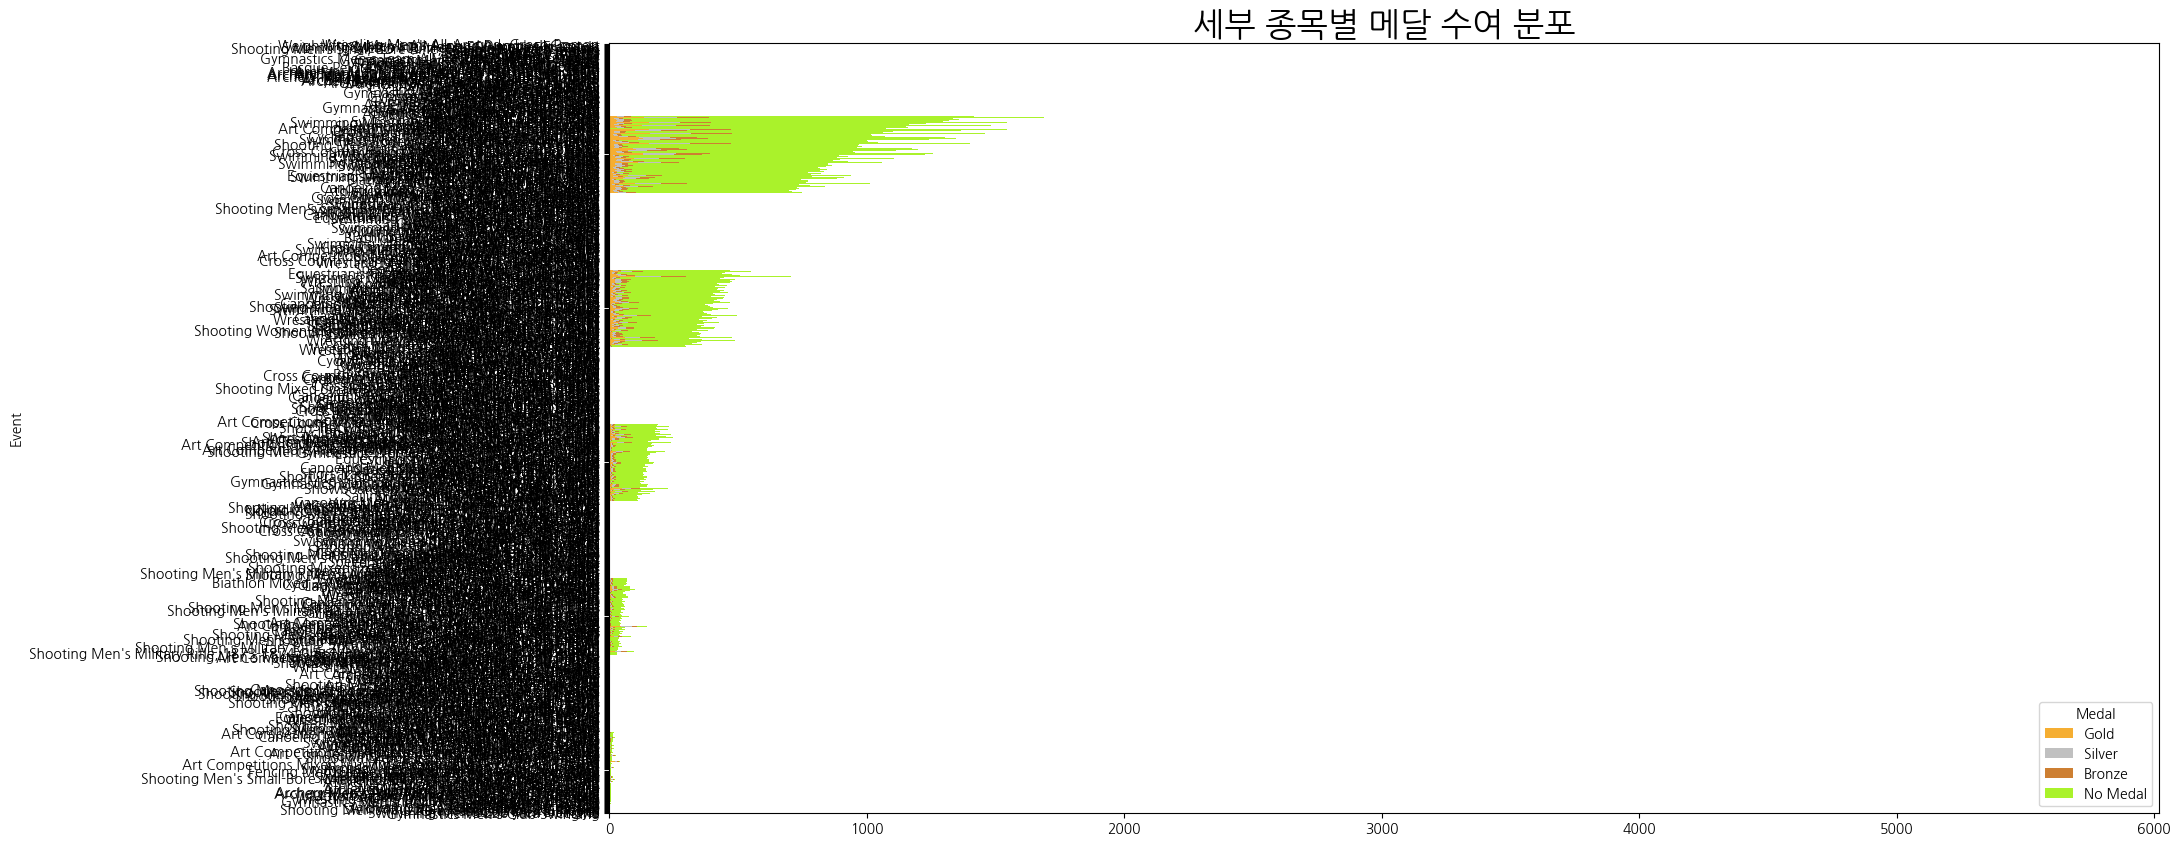

In [178]:
fig, ax = plt.subplots(figsize=(20, 10))

colors = [ '#F5AE32', '#C0C0C0', '#CD7F32', '#AAF22B']
event_medal.plot(kind='barh',  stacked=True, color=colors, ax=ax)

ax.set_title('세부 종목별 메달 수여 분포', fontsize=24)

plt.show()


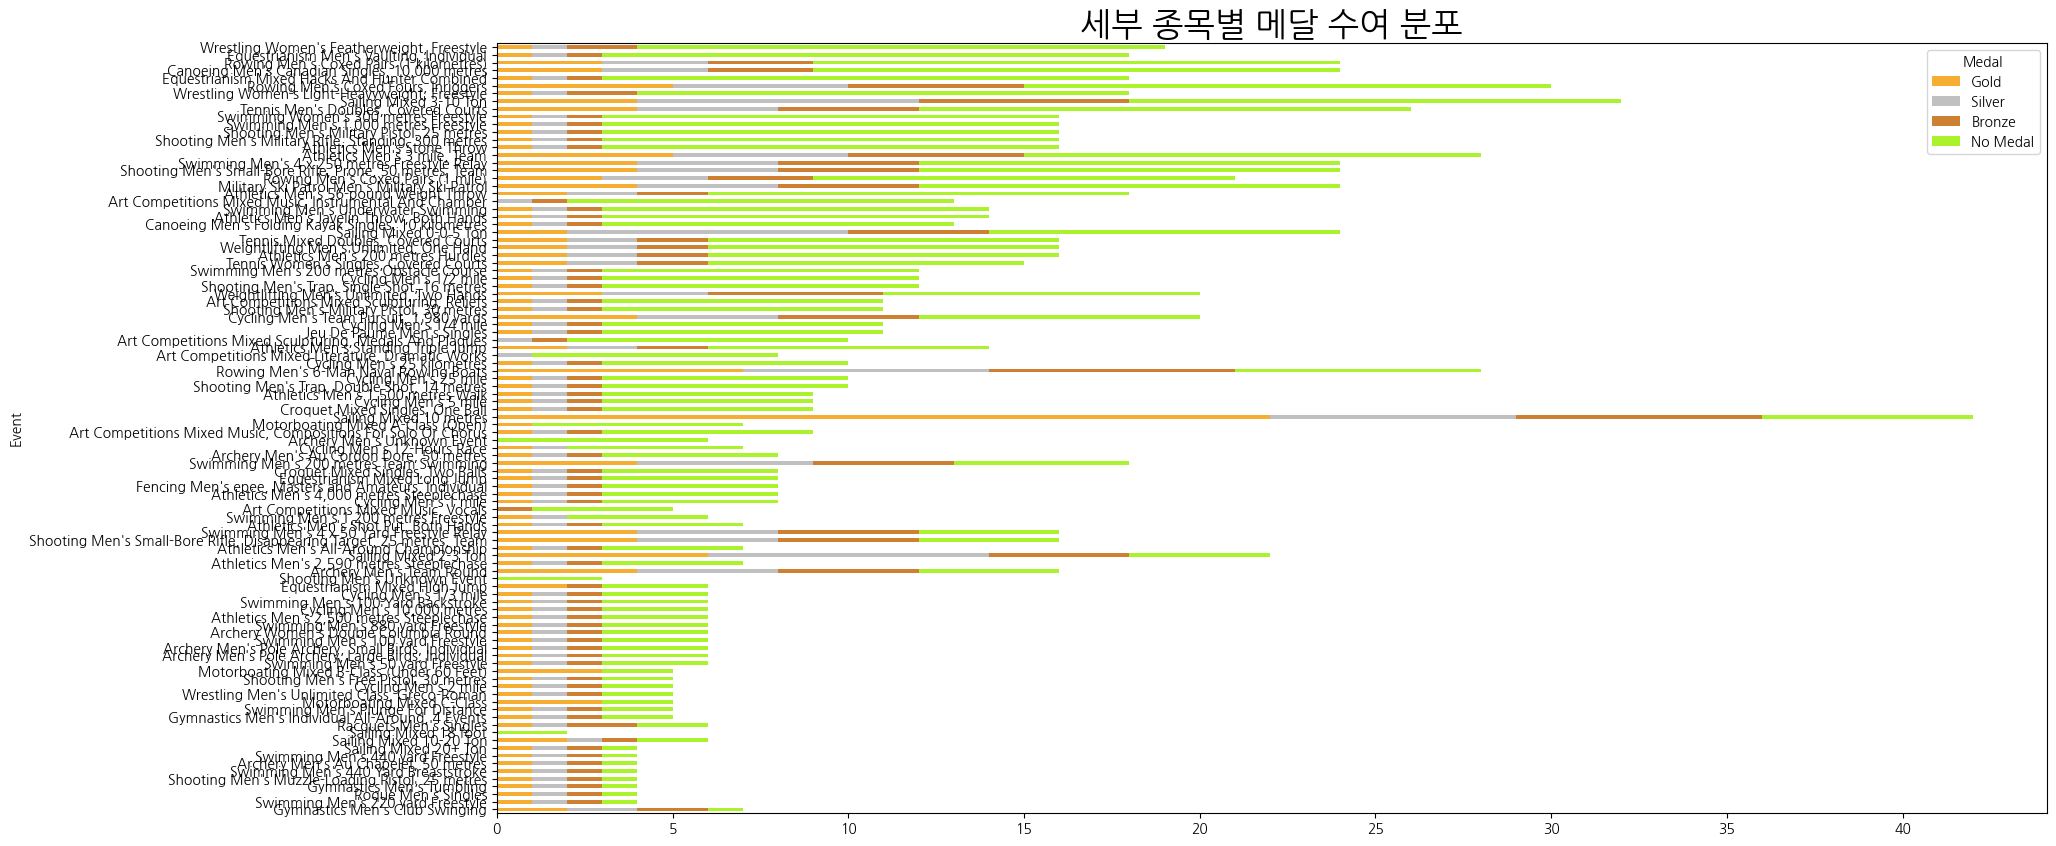

In [181]:
fig, ax = plt.subplots(figsize=(20, 10))

colors = [ '#F5AE32', '#C0C0C0', '#CD7F32', '#AAF22B']
event_medal[:100].plot(kind='barh',  stacked=True, color=colors, ax=ax)

ax.set_title('세부 종목별 메달 수여 분포', fontsize=24)

plt.show()


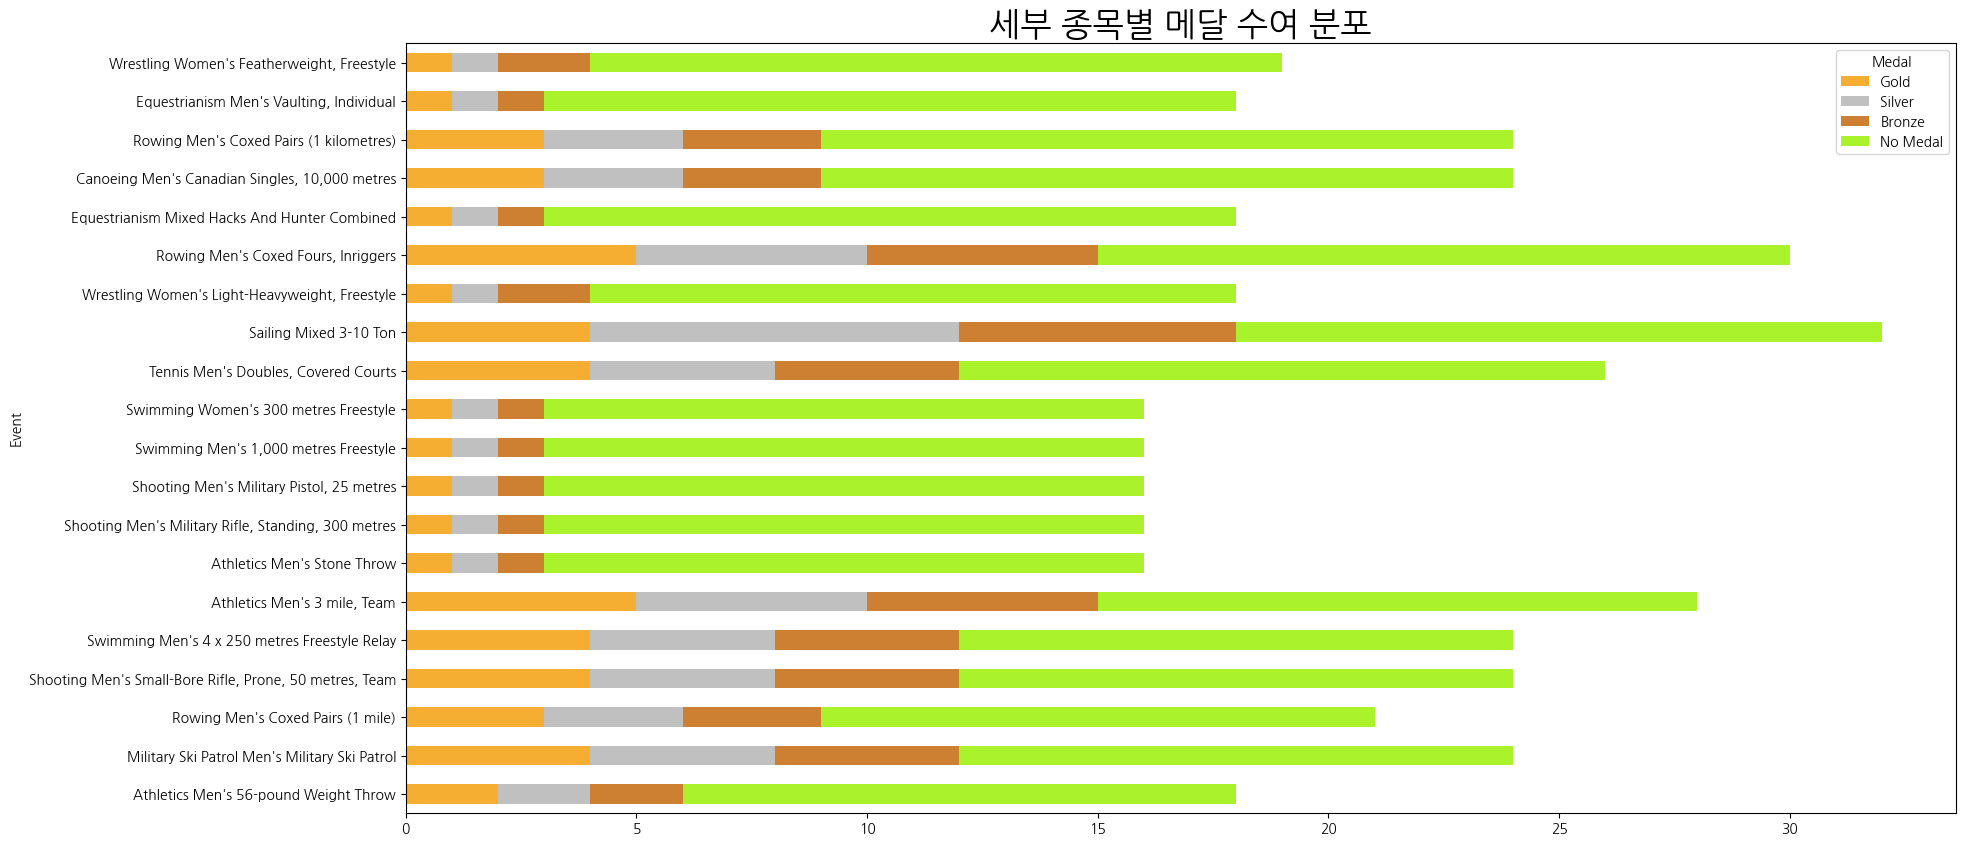

In [187]:
fig, ax = plt.subplots(figsize=(20, 10))

colors = [ '#F5AE32', '#C0C0C0', '#CD7F32', '#AAF22B']
event_medal[80:100].plot(kind='barh',  stacked=True, color=colors, ax=ax)

ax.set_title('세부 종목별 메달 수여 분포', fontsize=24)

plt.show()


# 동계 종목 분석

## 전체 이해

### 계절별 올림픽 기록량 확인

In [21]:
# 계절별 경기 기록량 확인
print(athelete_events[athelete_events['Season'] == 'Winter']['Season'].count())
print(athelete_events[athelete_events['Season'] == 'Summer']['Season'].count())
print(athelete_events[athelete_events['Season'] == 'Summer']['Season'].count()+
      athelete_events[athelete_events['Season'] == 'Winter']['Season'].count())

48564
222552
271116


In [138]:
'''
   총 271,116개
     - 하계: 222552
     - 동계: 27116
'''
winter_olympics_record = athelete_events[athelete_events['Season'] == 'Winter']

In [26]:
winter_olympics_record

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


### 중복치 확인 및 처리

In [65]:
# 중복치 확인  -> 없음
winter_olympics_record[winter_olympics_record.duplicated()]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal


### 결측치 확인 및 처리

In [32]:
# 결측치 확인
winter_olympics_record.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48564 entries, 4 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      48564 non-null  int64  
 1   Name    48564 non-null  object 
 2   Sex     48564 non-null  object 
 3   Age     48279 non-null  float64
 4   Height  40250 non-null  float64
 5   Weight  39543 non-null  float64
 6   Team    48564 non-null  object 
 7   NOC     48564 non-null  object 
 8   Games   48564 non-null  object 
 9   Year    48564 non-null  int64  
 10  Season  48564 non-null  object 
 11  City    48564 non-null  object 
 12  Sport   48564 non-null  object 
 13  Event   48564 non-null  object 
 14  Medal   5695 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 5.9+ MB


In [ ]:
'''
  Age    열 결측치:  285 개
  Height 열 결측치: 8314 개
  Weight 열 결측치: 9021 개
  Medal  열 결측치: 42869개
'''

### Medal 열 결측치 처리

#### Medal 열 정보 확인

In [36]:
winter_olympics_record['Medal']

4         NaN
5         NaN
6         NaN
7         NaN
8         NaN
         ... 
271111    NaN
271112    NaN
271113    NaN
271114    NaN
271115    NaN
Name: Medal, Length: 48564, dtype: object

In [37]:
winter_olympics_record['Medal'].isna()

4         True
5         True
6         True
7         True
8         True
          ... 
271111    True
271112    True
271113    True
271114    True
271115    True
Name: Medal, Length: 48564, dtype: bool

#### Medal 열 NaN을 No Medal로 변경

In [139]:
winter_olympics_record['Medal'] = winter_olympics_record['Medal'].fillna('No Medal')

<ipython-input-139-b935facd5600>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  winter_olympics_record['Medal'] = winter_olympics_record['Medal'].fillna('No Medal')


In [40]:
winter_olympics_record

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,No Medal
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",No Medal
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,No Medal
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",No Medal
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,No Medal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,No Medal
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",No Medal
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",No Medal
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,No Medal


#### Age 열 정보 확인

In [74]:
'''
   Age 값 결측 선수 중 메달 획득 기록
     - Gold  : 9
     - Bronze: 2

    ☞ 메닥 획득 선수 외 다른 선수 정보 제거
'''

print((winter_olympics_record[winter_olympics_record['Age'].isna()]['Medal'] == 'Gold').sum())
print((winter_olympics_record[winter_olympics_record['Age'].isna()]['Medal'] == 'Silver').sum())
print((winter_olympics_record[winter_olympics_record['Age'].isna()]['Medal'] == 'Bronze').sum())
winter_olympics_record[winter_olympics_record['Age'].isna()]['Medal'].value_counts()

9
0
2


Medal
No Medal    274
Gold          9
Bronze        2
Name: count, dtype: int64

#### Age 열 결측 선수 선별 제거

In [140]:
no_medal_index = winter_olympics_record[(winter_olympics_record['Age'].isna()) &
 (winter_olympics_record['Medal'] == 'No Medal')]['Age'].index

In [122]:
len(no_medal_index)

274

In [123]:
winter_olympics_record.loc[no_medal_index]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
6140,3456,Benik Amirian,M,NaN,NaN,NaN,Iran,IRI,1956 Winter,1956,Winter,Cortina d'Ampezzo,Alpine Skiing,Alpine Skiing Men's Downhill,No Medal
6141,3456,Benik Amirian,M,NaN,NaN,NaN,Iran,IRI,1956 Winter,1956,Winter,Cortina d'Ampezzo,Alpine Skiing,Alpine Skiing Men's Giant Slalom,No Medal
6142,3456,Benik Amirian,M,NaN,NaN,NaN,Iran,IRI,1956 Winter,1956,Winter,Cortina d'Ampezzo,Alpine Skiing,Alpine Skiing Men's Slalom,No Medal
8072,4463,Ren Ansermoz,M,NaN,NaN,NaN,Switzerland-2,SUI,1928 Winter,1928,Winter,Sankt Moritz,Bobsleigh,Bobsleigh Men's Four/Five,No Medal
8457,4656,Mohamed Aomar,M,NaN,166.0,59.0,Morocco,MAR,1968 Winter,1968,Winter,Grenoble,Alpine Skiing,Alpine Skiing Men's Giant Slalom,No Medal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264166,132193,Boris Yakimov,M,NaN,NaN,NaN,Soviet Union,URS,1956 Winter,1956,Winter,Cortina d'Ampezzo,Speed Skating,"Speed Skating Men's 5,000 metres",No Medal
264167,132193,Boris Yakimov,M,NaN,NaN,NaN,Soviet Union,URS,1956 Winter,1956,Winter,Cortina d'Ampezzo,Speed Skating,"Speed Skating Men's 10,000 metres",No Medal
267622,133889,Luciano Zampatti,M,NaN,NaN,NaN,Italy,ITA,1928 Winter,1928,Winter,Sankt Moritz,Ski Jumping,"Ski Jumping Men's Normal Hill, Individual",No Medal
267858,134010,Ernesto Zardini,M,NaN,173.0,NaN,Italy,ITA,1932 Winter,1932,Winter,Lake Placid,Ski Jumping,"Ski Jumping Men's Normal Hill, Individual",No Medal


In [141]:
winter_olympics_record.drop(no_medal_index, inplace=True)

<ipython-input-141-a4978b415b8a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  winter_olympics_record.drop(no_medal_index, inplace=True)


In [142]:
winter_olympics_record.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48290 entries, 4 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      48290 non-null  int64  
 1   Name    48290 non-null  object 
 2   Sex     48290 non-null  object 
 3   Age     48279 non-null  float64
 4   Height  40202 non-null  float64
 5   Weight  39510 non-null  float64
 6   Team    48290 non-null  object 
 7   NOC     48290 non-null  object 
 8   Games   48290 non-null  object 
 9   Year    48290 non-null  int64  
 10  Season  48290 non-null  object 
 11  City    48290 non-null  object 
 12  Sport   48290 non-null  object 
 13  Event   48290 non-null  object 
 14  Medal   48290 non-null  object 
dtypes: float64(3), int64(2), object(10)
memory usage: 5.9+ MB


In [144]:
'''
   Age 데이터가 없는 메달리스트 11명

   ☞ 모두 1924년 개최된 올림픽 기록
   ☞ 이들 모두 Height, Weight 데이터 결측

   메달리스트이긴 하나 참고할 수 없는 데이터이므로 모두 제거

   따라서 Age는 결측 정보를 모두 제거
'''
medal_list_but_age_unknown = winter_olympics_record[winter_olympics_record['Age'].isna()]

In [146]:
medal_list_but_age_unknown
medal_list_but_age_unknown_index = medal_list_but_age_unknown.index

In [149]:
winter_olympics_record

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,No Medal
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",No Medal
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,No Medal
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",No Medal
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,No Medal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,No Medal
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",No Medal
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",No Medal
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,No Medal


In [150]:
winter_olympics_record.drop(medal_list_but_age_unknown_index, inplace = True)

<ipython-input-150-407ef99a7d60>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  winter_olympics_record.drop(medal_list_but_age_unknown_index, inplace = True)


In [151]:
winter_olympics_record.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48279 entries, 4 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      48279 non-null  int64  
 1   Name    48279 non-null  object 
 2   Sex     48279 non-null  object 
 3   Age     48279 non-null  float64
 4   Height  40202 non-null  float64
 5   Weight  39510 non-null  float64
 6   Team    48279 non-null  object 
 7   NOC     48279 non-null  object 
 8   Games   48279 non-null  object 
 9   Year    48279 non-null  int64  
 10  Season  48279 non-null  object 
 11  City    48279 non-null  object 
 12  Sport   48279 non-null  object 
 13  Event   48279 non-null  object 
 14  Medal   48279 non-null  object 
dtypes: float64(3), int64(2), object(10)
memory usage: 5.9+ MB


#### Height 열 정보 확인

In [152]:
'''
   Height 값 결측 선수 중 메달 획득 기록
     - Gold  : 227
     - Silver: 219
     - Bronze: 264

    ☞ 메달 획득 선수 외 다른 선수 정보 제거
'''

print((winter_olympics_record[winter_olympics_record['Height'].isna()]['Medal'] == 'Gold').sum())
print((winter_olympics_record[winter_olympics_record['Height'].isna()]['Medal'] == 'Silver').sum())
print((winter_olympics_record[winter_olympics_record['Height'].isna()]['Medal'] == 'Bronze').sum())
winter_olympics_record[winter_olympics_record['Height'].isna()]['Medal'].value_counts()

227
219
264


Medal
No Medal    7367
Bronze       264
Gold         227
Silver       219
Name: count, dtype: int64

#### Height 열 결측 선수 선별 제거

In [153]:
no_medal_index = winter_olympics_record[(winter_olympics_record['Height'].isna()) &
 (winter_olympics_record['Medal'] == 'No Medal')]['Height'].index

In [154]:
len(no_medal_index)

7367

In [155]:
winter_olympics_record.drop(no_medal_index, inplace=True)

<ipython-input-155-a4978b415b8a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  winter_olympics_record.drop(no_medal_index, inplace=True)


In [156]:
medal_list_but_height_unknown = winter_olympics_record[winter_olympics_record['Height'].isna()]

In [157]:
medal_list_but_height_unknown

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
110,40,Roald Edgar Aas,M,23.0,NaN,NaN,Norway,NOR,1952 Winter,1952,Winter,Oslo,Speed Skating,"Speed Skating Men's 1,500 metres",Bronze
113,40,Roald Edgar Aas,M,31.0,NaN,NaN,Norway,NOR,1960 Winter,1960,Winter,Squaw Valley,Speed Skating,"Speed Skating Men's 1,500 metres",Gold
673,392,George Gordon Abel,M,35.0,NaN,NaN,Canada,CAN,1952 Winter,1952,Winter,Oslo,Ice Hockey,Ice Hockey Men's Ice Hockey,Gold
935,529,Karl Gustaf Emanuel Abrahamsson,M,31.0,NaN,NaN,Sweden,SWE,1928 Winter,1928,Winter,Sankt Moritz,Ice Hockey,Ice Hockey Men's Ice Hockey,Silver
2397,1341,Johan Petter hln (Andersson-),M,44.0,NaN,NaN,Sweden,SWE,1924 Winter,1924,Winter,Chamonix,Curling,Curling Men's Curling,Silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266074,133113,Yevgeny Mikhaylovich Yorkin,M,27.0,NaN,NaN,Soviet Union,URS,1960 Winter,1960,Winter,Squaw Valley,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
267059,133608,Oldich Zbrodsk,M,21.0,NaN,NaN,Czechoslovakia,TCH,1948 Winter,1948,Winter,Sankt Moritz,Ice Hockey,Ice Hockey Men's Ice Hockey,Silver
267067,133610,Vladimr Olegovic Zbrodsk,M,24.0,NaN,NaN,Czechoslovakia,TCH,1948 Winter,1948,Winter,Sankt Moritz,Ice Hockey,Ice Hockey Men's Ice Hockey,Silver
268129,134143,Boris Mikhaylovich Zaytsev,M,26.0,NaN,NaN,Soviet Union,URS,1964 Winter,1964,Winter,Innsbruck,Ice Hockey,Ice Hockey Men's Ice Hockey,Gold


In [167]:
medal_list_but_height_unknown['Year'].value_counts()

Year
1948    120
1952    108
1924     91
1936     74
1956     65
1928     61
1932     60
1960     52
1964     22
1980     19
1988     12
1994      7
1992      7
1976      7
1998      3
1968      1
1984      1
Name: count, dtype: int64

In [170]:
winter_olympics_record['Medal'].value_counts()

Medal
No Medal    35228
Gold         1904
Silver       1896
Bronze       1884
Name: count, dtype: int64

In [ ]:
'''
   Height 데이터가 없는 메달리스트 710명

   ☞ 이 중 1998년 이전 기록이 97퍼센트, 전체 메달리스의 12%

   메달리스트이긴 하나 12%에 해당하는 데이터에 대한 제거 외의 처리는 오히려
   전체 데이터 왜곡 심화에 기여할 것이라 판단

   따라서 Height 결측 기록 모두 제거
'''

In [171]:
medal_list_but_height_unknown_index = medal_list_but_height_unknown.index

In [174]:
winter_olympics_record.drop(medal_list_but_height_unknown_index, inplace = True)

<ipython-input-174-78b1dfb300a5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  winter_olympics_record.drop(medal_list_but_height_unknown_index, inplace = True)


In [175]:
winter_olympics_record

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,No Medal
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",No Medal
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,No Medal
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",No Medal
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,No Medal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,No Medal
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",No Medal
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",No Medal
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,No Medal


#### Weight 열 정보 확인

In [176]:
'''
   Weight 값 결측 선수 중 메달 획득 기록
     - Gold  : 52
     - Silver: 44
     - Bronze: 38

    ☞ 메달 획득 선수 외 다른 선수 정보 제거
'''

print((winter_olympics_record[winter_olympics_record['Weight'].isna()]['Medal'] == 'Gold').sum())
print((winter_olympics_record[winter_olympics_record['Weight'].isna()]['Medal'] == 'Silver').sum())
print((winter_olympics_record[winter_olympics_record['Weight'].isna()]['Medal'] == 'Bronze').sum())
winter_olympics_record[winter_olympics_record['Weight'].isna()]['Medal'].value_counts()

52
44
38


Medal
No Medal    609
Gold         52
Silver       44
Bronze       38
Name: count, dtype: int64

#### Weight 열 결측 선수 선별 제거

In [177]:
no_medal_index = winter_olympics_record[(winter_olympics_record['Weight'].isna()) &
 (winter_olympics_record['Medal'] == 'No Medal')]['Weight'].index

In [178]:
len(no_medal_index)

609

In [179]:
winter_olympics_record.drop(no_medal_index, inplace=True)

<ipython-input-179-a4978b415b8a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  winter_olympics_record.drop(no_medal_index, inplace=True)


In [193]:
medal_list_but_weight_unknown = winter_olympics_record[winter_olympics_record['Weight'].isna()]

In [194]:
medal_list_but_weight_unknown

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
6266,3514,Zinaida Stepanovna Amosova (Shishkina-),F,26.0,163.0,NaN,Soviet Union,URS,1976 Winter,1976,Winter,Innsbruck,Cross Country Skiing,Cross Country Skiing Women's 4 x 5 kilometres ...,Gold
6735,3775,Reidar Andersen,M,24.0,180.0,NaN,Norway,NOR,1936 Winter,1936,Winter,Garmisch-Partenkirchen,Ski Jumping,"Ski Jumping Men's Normal Hill, Individual",Bronze
13460,7304,Ivar Eugen Ballangrud (Eriksen-),M,23.0,180.0,NaN,Norway,NOR,1928 Winter,1928,Winter,Sankt Moritz,Speed Skating,"Speed Skating Men's 1,500 metres",Bronze
13461,7304,Ivar Eugen Ballangrud (Eriksen-),M,23.0,180.0,NaN,Norway,NOR,1928 Winter,1928,Winter,Sankt Moritz,Speed Skating,"Speed Skating Men's 5,000 metres",Gold
13464,7304,Ivar Eugen Ballangrud (Eriksen-),M,27.0,180.0,NaN,Norway,NOR,1932 Winter,1932,Winter,Lake Placid,Speed Skating,"Speed Skating Men's 10,000 metres",Silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260511,130370,Axel Theodor Wikstrm,M,24.0,178.0,NaN,Sweden,SWE,1932 Winter,1932,Winter,Lake Placid,Cross Country Skiing,Cross Country Skiing Men's 18 kilometres,Silver
260512,130370,Axel Theodor Wikstrm,M,28.0,178.0,NaN,Sweden,SWE,1936 Winter,1936,Winter,Garmisch-Partenkirchen,Cross Country Skiing,Cross Country Skiing Men's 50 kilometres,Silver
261423,130800,"William Stewart Montgomery ""Bud"" Wilson",M,22.0,182.0,NaN,Canada,CAN,1932 Winter,1932,Winter,Lake Placid,Figure Skating,Figure Skating Men's Singles,Bronze
264227,132228,Viktor Prokhorovich Yakushev,M,22.0,171.0,NaN,Soviet Union,URS,1960 Winter,1960,Winter,Squaw Valley,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze


In [195]:
medal_list_but_weight_unknown.info()

<class 'pandas.core.frame.DataFrame'>
Index: 134 entries, 6266 to 264228
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      134 non-null    int64  
 1   Name    134 non-null    object 
 2   Sex     134 non-null    object 
 3   Age     134 non-null    float64
 4   Height  134 non-null    float64
 5   Weight  0 non-null      float64
 6   Team    134 non-null    object 
 7   NOC     134 non-null    object 
 8   Games   134 non-null    object 
 9   Year    134 non-null    int64  
 10  Season  134 non-null    object 
 11  City    134 non-null    object 
 12  Sport   134 non-null    object 
 13  Event   134 non-null    object 
 14  Medal   134 non-null    object 
dtypes: float64(3), int64(2), object(10)
memory usage: 16.8+ KB


In [ ]:
'''
   Weight 데이터가 없는 메달리스트 134명

   전체에 비해 메달 차지 비중이 6%, 우선 결측 기록 모두 제거
'''

In [196]:
medal_list_but_weight_unknown_index = medal_list_but_weight_unknown.index

In [198]:
winter_olympics_record.drop(medal_list_but_weight_unknown_index, inplace = True)

<ipython-input-198-8eb824fa45a5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  winter_olympics_record.drop(medal_list_but_weight_unknown_index, inplace = True)


In [203]:
winter_olympics_record.to_csv('winter olympics record.csv', index = False)

# 국가별 메달 획득 추이 분석

In [1]:
pip install koreanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 8.6 MB/s eta 0:00:00


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib
import numpy as np

In [6]:
LONG_LATI = pd.read_csv('/content/drive/MyDrive/아이펠 온라인 8기 코어 과정/아이펠 본과정/데이터톤/noc_regions.csv')
athelete_events = pd.read_csv('/content/drive/MyDrive/아이펠 온라인 8기 코어 과정/아이펠 본과정/데이터톤/athelete_events_with_L_l_N.csv')

In [7]:
LONG_LATI

,City,Team,NOC,Event,Nation,latitude,longitude,Sex,Year,Season,Sport,Latitude,Longitude,Medal
0,Albertville Amsterdam Antwerpen Athina Atlanta...,string,string,string,string,continuous,continuous,F M,continuous,Summer Winter,Aeronautics Alpine\ Skiing Alpinism Archery Ar...,continuous,continuous,Bronze Gold Silver
1,meta,meta,meta,meta,meta,meta,meta,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Barcelona,China,CHN,Basketball Men's Basketball,China,39.8819,-3.48933,M,1992,Summer,Basketball,36.9026,98.5938,NaN
3,London,China,CHN,Judo Men's Extra-Lightweight,China,54.3103,-1.90973,M,2012,Summer,Judo,36.9026,98.5938,NaN
4,Antwerpen,Denmark,DEN,Football Men's Football,Denmark,NaN,NaN,M,1920,Summer,Football,56.2612,9.24882,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271113,Innsbruck,Poland-1,POL,Luge Mixed (Men)'s Doubles,Poland,NaN,NaN,M,1976,Winter,Luge,51.9217,19.1588,NaN
271114,Sochi,Poland,POL,"Ski Jumping Men's Large Hill, Individual",Poland,NaN,NaN,M,2014,Winter,Ski Jumping,51.9217,19.1588,NaN
271115,Sochi,Poland,POL,"Ski Jumping Men's Large Hill, Team",Poland,NaN,NaN,M,2014,Winter,Ski Jumping,51.9217,19.1588,NaN
271116,Nagano,Poland,POL,Bobsleigh Men's Four,Poland,NaN,NaN,M,1998,Winter,Bobsleigh,51.9217,19.1588,NaN


## 국가별 경위도 데이터 결측치 처리

In [266]:
missing_value_index = LONG_LATI[LONG_LATI['latitude'].isna()].index

In [267]:
'''
   region 정보 없는 행 삭제
'''
LONG_LATI.drop(missing_value_index, inplace = True)

In [286]:
LONG_LATI

,NOC,latitude,longitude,region
0,AFG,33.9328,65.181000,Afghanistan
1,AHO,12.2130,-69.030800,Curacao
2,ALB,41.1253,20.009700,Albania
3,ALG,28.0672,0.587023,Algeria
4,AND,42.5360,1.561740,Andorra
...,...,...,...,...
225,YEM,15.7848,47.485000,Yemen
226,YMD,15.7848,47.485000,Yemen
227,YUG,44.2026,20.997300,Serbia
228,ZAM,-13.1255,25.415200,Zambia


In [268]:
LONG_LATI.to_csv('long lati.csv', index = False)

## 국가별 경위도 정보 athelete_events에 추가

In [269]:
athelete_events['Latitude'] = np.nan
athelete_events['Longitude'] = np.nan

In [272]:
# 위도, 경도 정보를 athelete_events에 추가

for i in range(len(athelete_events)):
  for j in range(len(LONG_LATI['NOC'])):
    if athelete_events['NOC'][i] == LONG_LATI['NOC'].values[j]:
      athelete_events['Latitude'][i]  = LONG_LATI['latitude'].values[j]
      athelete_events['Longitude'][i] = LONG_LATI['longitude'].values[j]

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
<ipython-input-272-140b5e1606fc>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  athelete_events['Latitude'][i]  = LONG_LATI['latitude'].values[j]
<ipython-input-272-140b5e1606fc>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  athelete_events['Longitude'][i] = LONG_LATI['longitude'].values[j]
<ipython-input-272-140b5e1606fc>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  athelete_events['Latitud

In [275]:
#athelete_events.to_csv('athelete_events_with_L_l.csv', index = False)

In [283]:
athelete_events

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Latitude,Longitude
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,36.9026,98.59380
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,36.9026,98.59380
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,56.2612,9.24882
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,56.2612,9.24882
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,52.1079,5.53410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN,51.9217,19.15880
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN,51.9217,19.15880
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN,51.9217,19.15880
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN,51.9217,19.15880


In [284]:
athelete_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 17 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   ID         271116 non-null  int64  
 1   Name       271116 non-null  object 
 2   Sex        271116 non-null  object 
 3   Age        261642 non-null  float64
 4   Height     210945 non-null  float64
 5   Weight     208241 non-null  float64
 6   Team       271116 non-null  object 
 7   NOC        271116 non-null  object 
 8   Games      271116 non-null  object 
 9   Year       271116 non-null  int64  
 10  Season     271116 non-null  object 
 11  City       271116 non-null  object 
 12  Sport      271116 non-null  object 
 13  Event      271116 non-null  object 
 14  Medal      39783 non-null   object 
 15  Latitude   270652 non-null  float64
 16  Longitude  270652 non-null  float64
dtypes: float64(5), int64(2), object(10)
memory usage: 35.2+ MB


## 국가명 열 추가

In [285]:
athelete_events['Nation'] = np.nan

In [287]:
for i in range(len(athelete_events)):
  for j in range(len(LONG_LATI['NOC'])):
    if athelete_events['NOC'][i] == LONG_LATI['NOC'].values[j]:
      athelete_events['Nation'][i]  = LONG_LATI['region'].values[j]

<ipython-input-287-d1baa391bbb9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  athelete_events['Nation'][i]  = LONG_LATI['region'].values[j]


In [288]:
athelete_events.to_csv('athelete_events_with_L_l_N.csv', index = False)

In [7]:
athelete_events

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Latitude,Longitude,Nation
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,36.9026,98.59380,China
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,36.9026,98.59380,China
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,56.2612,9.24882,Denmark
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,56.2612,9.24882,Denmark
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,52.1079,5.53410,Netherlands
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN,51.9217,19.15880,Poland
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN,51.9217,19.15880,Poland
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN,51.9217,19.15880,Poland
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN,51.9217,19.15880,Poland


## 결측치 제거

In [14]:
athelete_events[athelete_events['Latitude'].isna()]['Medal'].value_counts()

Medal
Bronze    7
Silver    5
Gold      2
Name: count, dtype: int64

##

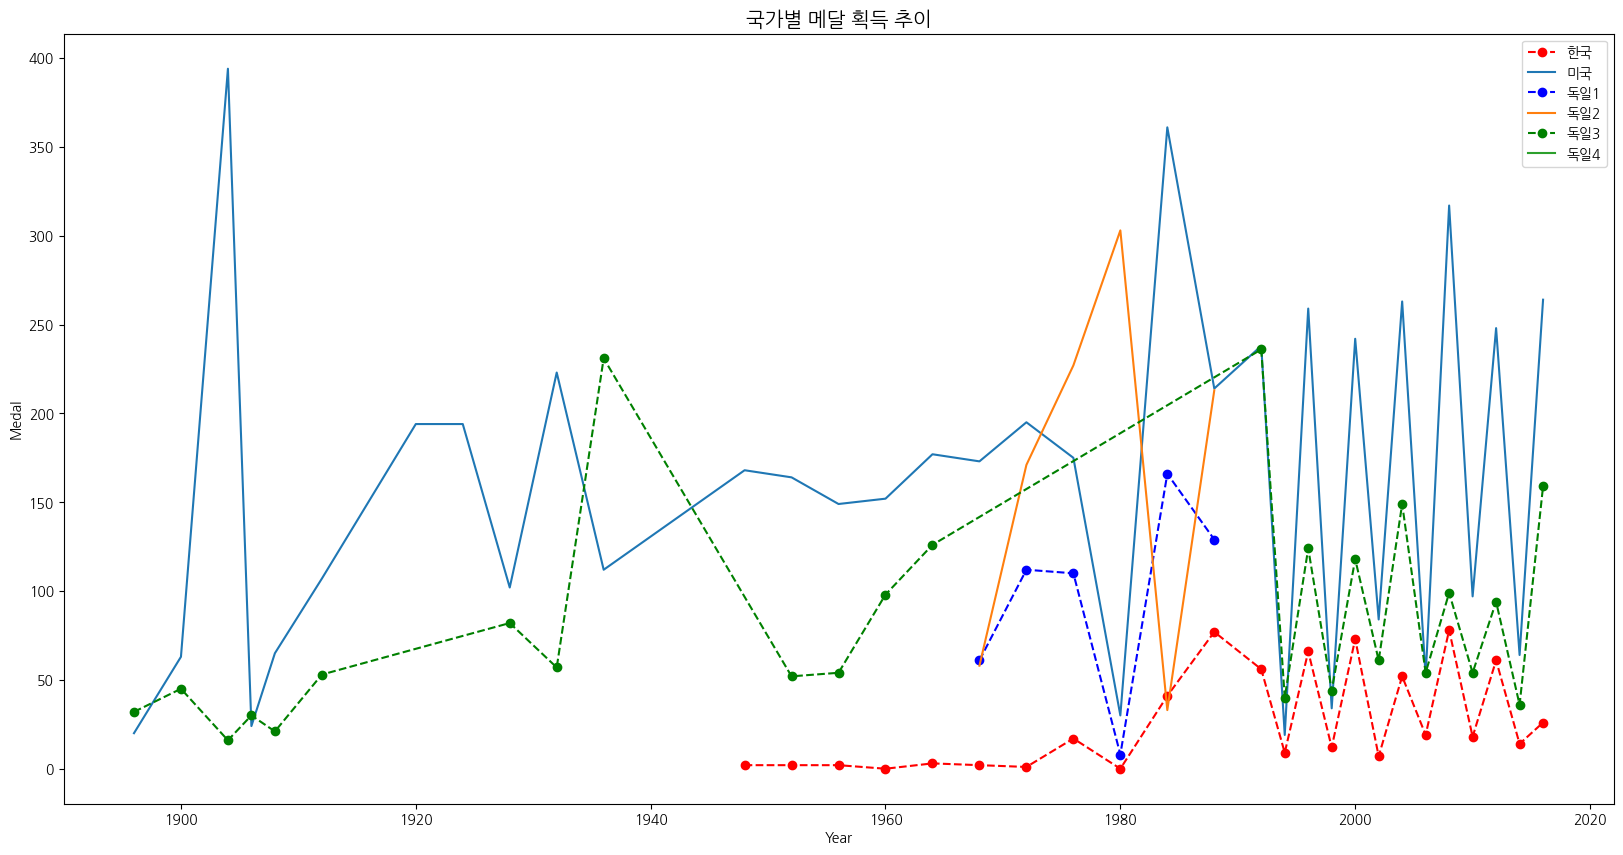

In [216]:
plt.figure(figsize=(20, 10))
plt.plot(athelete_events.groupby(['NOC', 'Year'])['Medal'].count()['KOR',].index,
         athelete_events.groupby(['NOC', 'Year'])['Medal'].count()['KOR',].values, marker='o', linestyle='--',
         color = 'red', label ='한국')
plt.plot(athelete_events.groupby(['NOC', 'Year'])['Medal'].count()['USA',].index,
         athelete_events.groupby(['NOC', 'Year'])['Medal'].count()['USA',].values, label = '미국')
plt.plot(athelete_events.groupby(['NOC', 'Year'])['Medal'].count()['FRG',].index,
         athelete_events.groupby(['NOC', 'Year'])['Medal'].count()['FRG',].values, marker='o', linestyle='--',
         color = 'blue', label = '독일1')
plt.plot(athelete_events.groupby(['NOC', 'Year'])['Medal'].count()['GDR',].index,
         athelete_events.groupby(['NOC', 'Year'])['Medal'].count()['GDR',].values, label = '독일2')
plt.plot(athelete_events.groupby(['NOC', 'Year'])['Medal'].count()['GER',].index,
         athelete_events.groupby(['NOC', 'Year'])['Medal'].count()['GER',].values, marker='o', linestyle='--',
         color = 'green', label = '독일3')
plt.plot(athelete_events.groupby(['NOC', 'Year'])['Medal'].count()['SAA',].index,
         athelete_events.groupby(['NOC', 'Year'])['Medal'].count()['SAA',].values, label = '독일4')
plt.legend()
plt.style.use('ggplot')
plt.xlabel('Year')
plt.ylabel('Medal')
plt.title('국가별 메달 획득 추이')

plt.show()